In [9]:
# 用k-means对球员司职进行聚类
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
sns.set(font=myfont.get_name())

In [2]:
data=pd.read_csv('../Data/players_info/players_info_classified.csv')
data=data.dropna(how='any')
data.head()

,Position,Value,Rating,PACE,SHOOTING,PASSING,DRIBBLING,DEFENCE,PHYSICAL,位置
0,RW,103500.0,93,85,92,91,95,38,65,边锋
1,ST,124500.0,92,78,92,79,85,44,82,中锋
2,ST,63000.0,92,89,93,81,89,35,77,中锋
3,CM,127500.0,91,76,86,93,88,64,78,中场
4,LW,132000.0,91,91,85,86,94,36,58,边锋


In [5]:
data_test=data.query("位置=='中锋' or 位置=='中场' or 位置=='中后卫'")

X=data_test.drop(['位置','Position','Rating','Value'],axis=1)
y=data_test['位置'].to_list()


#y_pred = KMeans(n_clusters=4).fit_predict(X)
estimator = KMeans(n_clusters=3, init='k-means++')
estimator.fit(X)
y_pred = estimator.predict(X)

score = silhouette_score(X, y_pred)
print("模型轮廓系数为(1 最好, -1 最差):", score)

模型轮廓系数为(1 最好, -1 最差): 0.3561729275573156


In [15]:
X['位置']=y_pred
def change_label(row):
    if row['位置']==0:
        return '中场'
    elif row['位置']==1:
        return '中后卫'
    else:
        return '中锋'
s=X.apply(lambda row:change_label(row),axis=1)
X['位置']=s

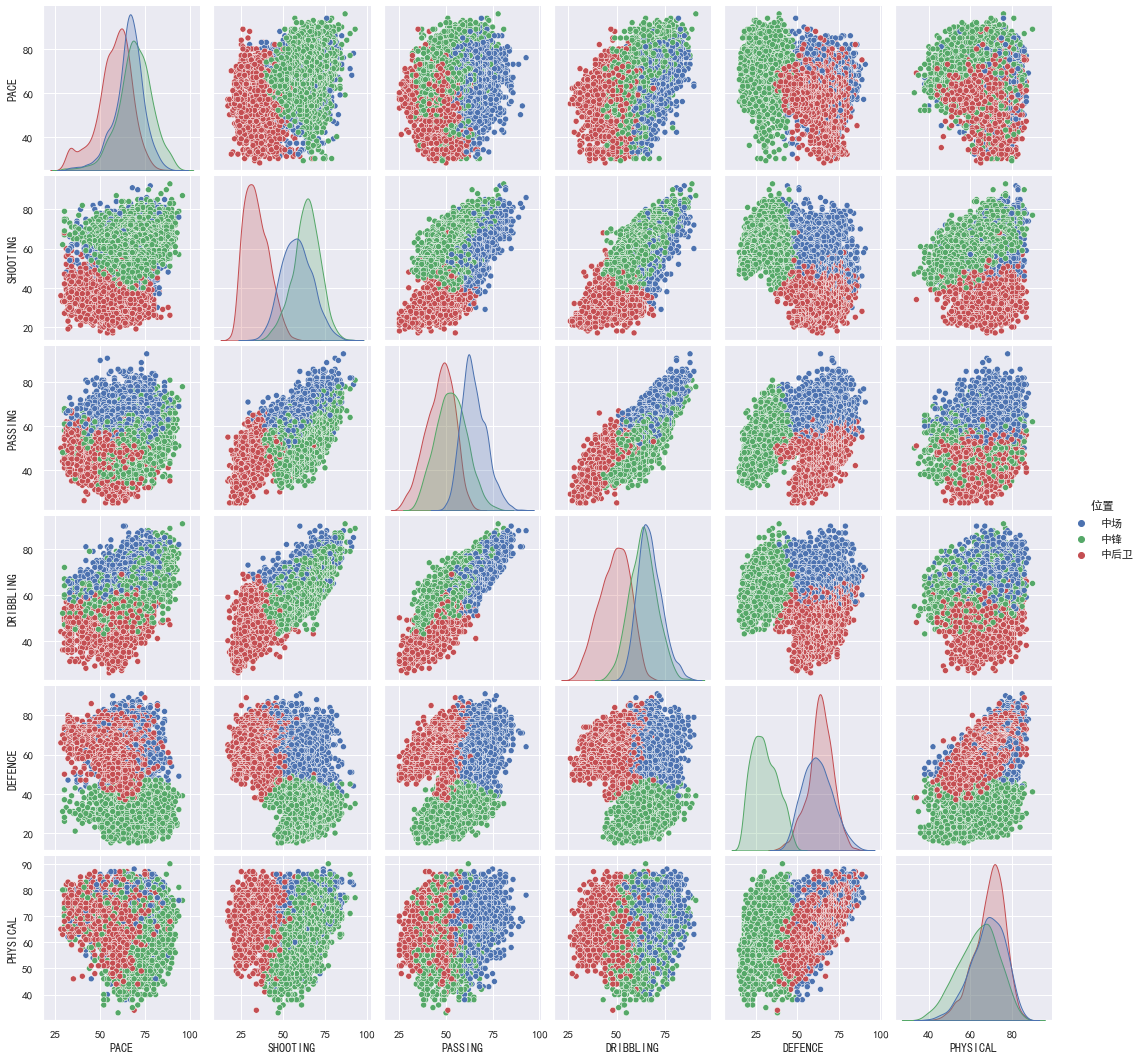

In [18]:
color_dict={'中场':'b','中锋':'g','中后卫':'r'}
pred_fig=sns.pairplot(X,hue='位置',palette=color_dict)

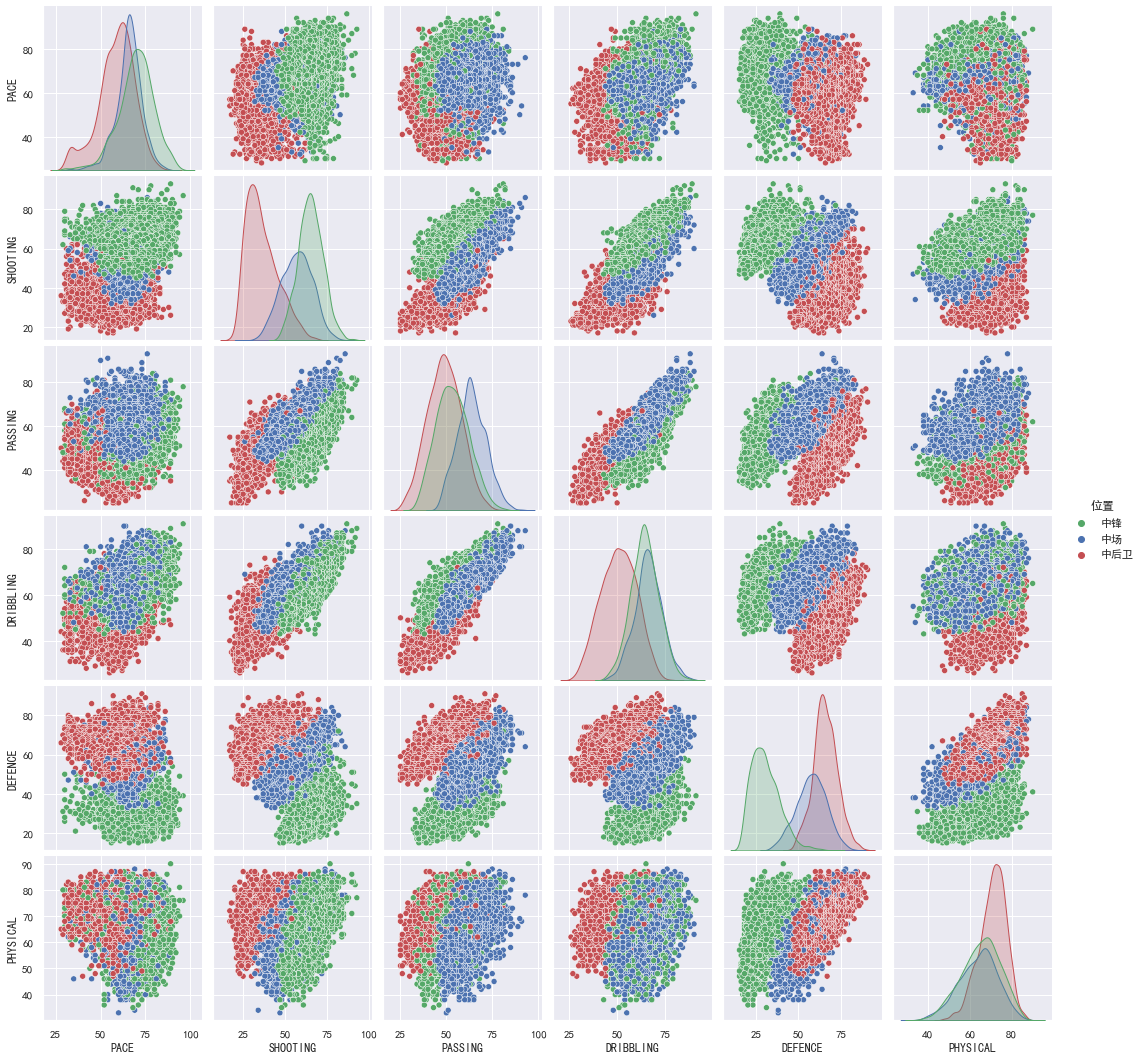

In [19]:
X_real=data_test.drop(['Position','Rating','Value'],axis=1)
real_fig=sns.pairplot(X_real,hue='位置',palette=color_dict)

In [16]:
pred=X['位置'].to_list()
test=X_real['位置'].to_list()
count=0
for i in range(len(pred)):
    if pred[i] == test[i]:
        count+=1
print('准确率为: ' + str(count/len(pred)))

准确率为: 0.8687674006580612


In [21]:
pred_fig.savefig('../Data/players_info/pred_fig.png', dpi = 400) 
real_fig.savefig('../Data/players_info/real_fig.png', dpi = 400) 